<a href="https://colab.research.google.com/github/Nitesh-Kumar-074/NetwrokIntrusionDetectionSystem/blob/main/NIDS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

In [ ]:
train_data = pd.read_csv(r"/content/drive/MyDrive/train_alldata3_EDA.csv",chunksize=10000)
train = pd.concat(train_data,ignore_index=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778032 entries, 0 to 1778031
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [ ]:
train.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object')

In [ ]:
normal = train[train['label']==0]
anomaly = train[train['label']==1]

In [ ]:
train.shape

(1778032, 49)

In [ ]:
def multi_corr(col1,col2='label',df=train):
       '''
       This function returns correlation between two given features also a feature
       with label feature.
       '''
       corr = df[[col1,col2]].corr().iloc[0,1]
       log_corr = df[col1].apply(np.log1p).corr(df[col2])
       print("Correlation between {} and {} is equal to {}\n Log correlation between {} and {} is equal to {}".format(col1,col2,corr,col1,col2,log_corr))

In [ ]:
def corr(col1,col2='label',df=train):
       return df[[col1,col2]].corr().iloc[0,1]

In [ ]:
non_numeric_cols = train.select_dtypes(exclude=[np.number]).columns.tolist()

print(non_numeric_cols)

['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'attack_cat']


In [ ]:
train_numeric = train.drop(columns=non_numeric_cols)

Plotting the correlation matrix.

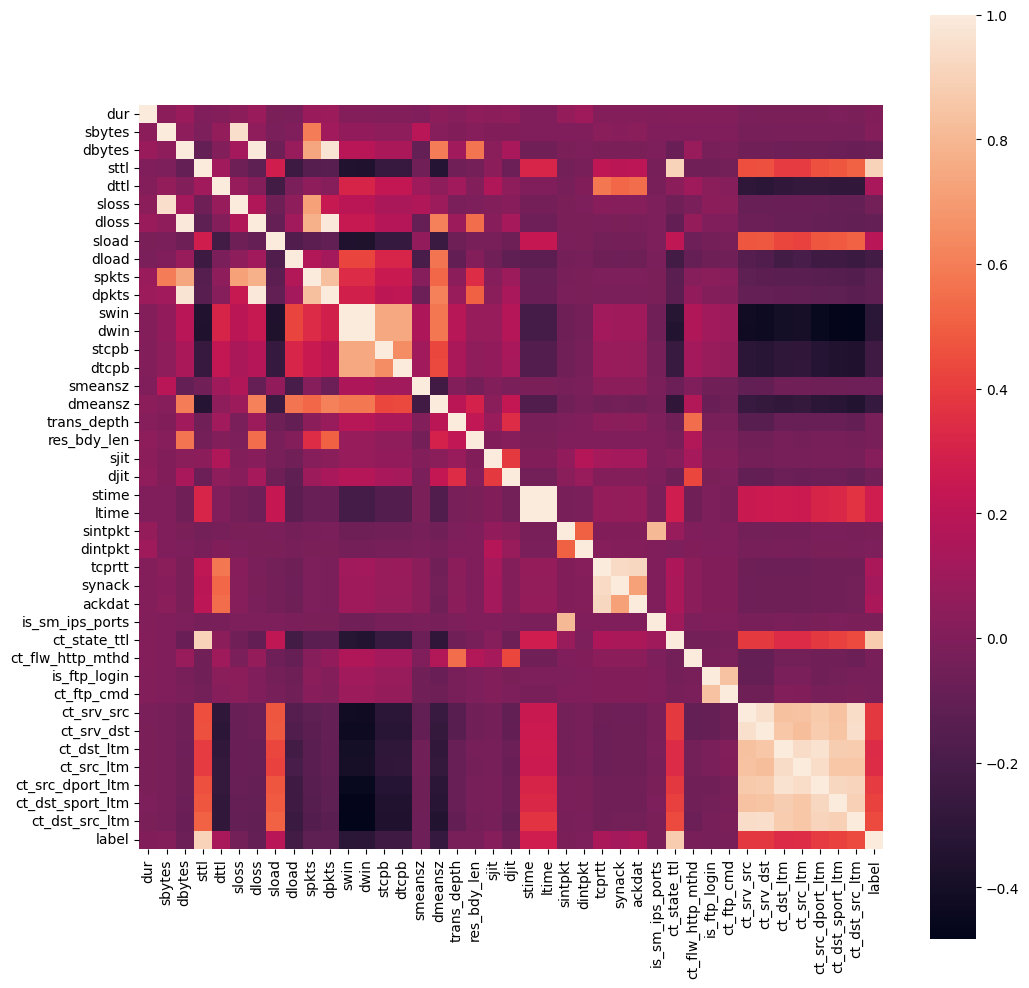

In [ ]:
method = "pearson"
corr_mat = train_numeric.corr(method=method)

plt.figure(figsize=(12,12))
sns.heatmap(corr_mat,square=True)
plt.show()

Getting attribute pairs whose correlation value is greater than equal to 0.9

In [ ]:
columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
       for j in range(i+1,corr_mat.shape[0]):
              if corr_mat.iloc[i,j] >= 0.9:
                     print(columns[i]," and ",columns[j]," correlation value is ",corr_mat.iloc[i,j])

sbytes  and  sloss  correlation value is  0.9515464133660682
dbytes  and  dloss  correlation value is  0.9912941785427634
dbytes  and  dpkts  correlation value is  0.9705744719061106
sttl  and  ct_state_ttl  correlation value is  0.9058027624589845
sttl  and  label  correlation value is  0.9043459910087561
dloss  and  dpkts  correlation value is  0.9921743916746946
swin  and  dwin  correlation value is  0.9971933359586712
stime  and  ltime  correlation value is  0.9999999998073185
tcprtt  and  synack  correlation value is  0.9332414134584021
tcprtt  and  ackdat  correlation value is  0.9202047490089745
ct_srv_src  and  ct_srv_dst  correlation value is  0.956721026945663
ct_srv_src  and  ct_dst_src_ltm  correlation value is  0.942148711061324
ct_srv_dst  and  ct_dst_src_ltm  correlation value is  0.9510250540010916
ct_dst_ltm  and  ct_src_ltm  correlation value is  0.9384612565049639
ct_dst_ltm  and  ct_src_dport_ltm  correlation value is  0.9601144948755526
ct_src_ltm  and  ct_src_dpor

From analysis highly correlated columns are
sbytes,sloss
dbytes,dloss,dpkts
sttl,ct_state_ttl,label
swin,dwin
stime,ltime
tcprtt,synack,ackdat
ct_srv_src,ct_srv_dst,ct_dst_src_ltm
ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(data=train,vars=['sbytes','sloss'])
plt.show()

KeyboardInterrupt: 

Now, pairplots of highly correlated features.

In [ ]:
def col_countplot(col, train_data=train):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:

def reduce_column(s, to_keep):
    """
    This function reduce categorical values of a given feature to values provided in to_keep list
    and make every other value "others"
    """
    s = str(s).lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

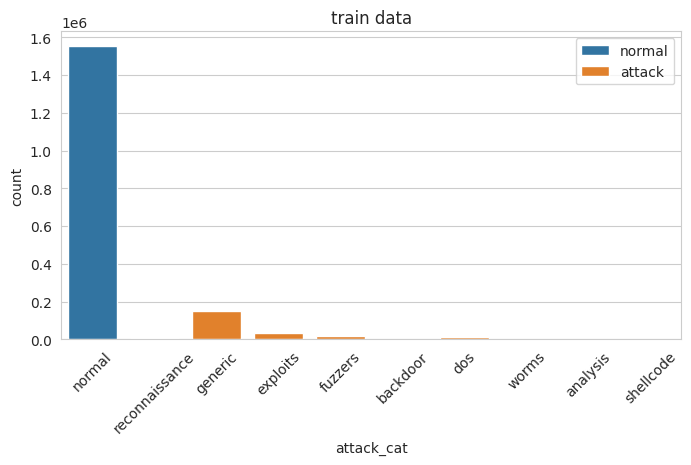

In [ ]:
col_countplot('attack_cat')

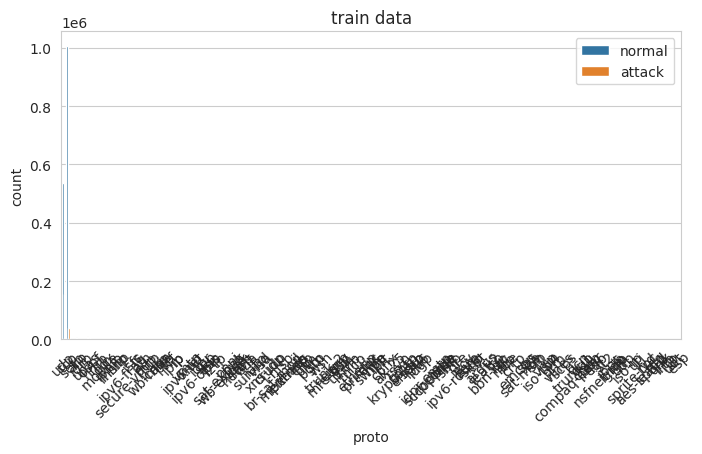

In [ ]:
col_countplot('proto')

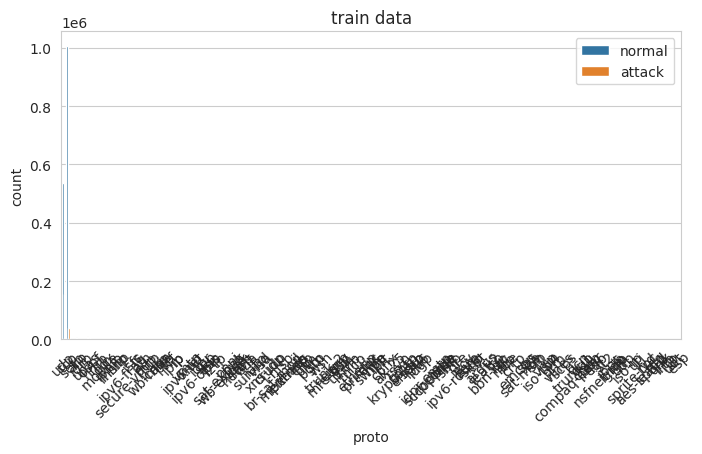

In [ ]:
col_countplot('proto',train)

In [ ]:
train['proto'].value_counts().head(10)*100/train.shape[0]

,count
proto,
tcp,58.858108
udp,38.983550
unas,0.639640
arp,0.397631
ospf,0.306800
sctp,0.061810
icmp,0.020303
any,0.015916
gre,0.013104


In [ ]:
to_keep = ['tcp', 'udp', 'unas', 'arp', 'ospf']
train['proto_reduced'] = train['proto'].apply(reduce_column, args=(to_keep,))

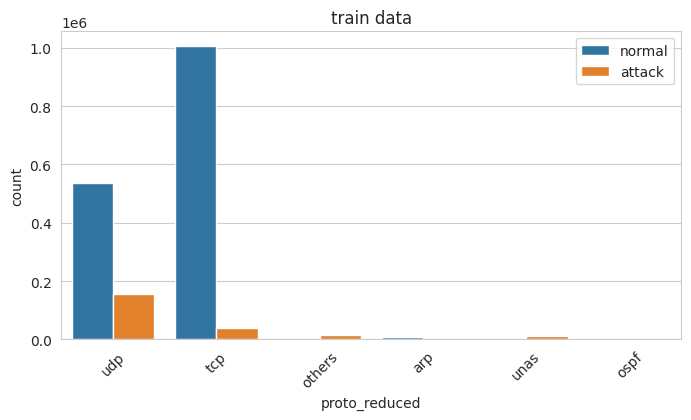

In [ ]:
col_countplot('proto_reduced')

In [ ]:
train['service'].value_counts()

,count
service,
dns,547094
http,144555
ftp-data,88310
smtp,57160
ftp,34293
ssh,32897
pop3,1076
dhcp,124
ssl,109


In [ ]:
train['service'].nunique()

12

In [ ]:
to_keep = ['dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']
train['service_reduced'] = train['service'].apply(reduce_column, args=(to_keep,))

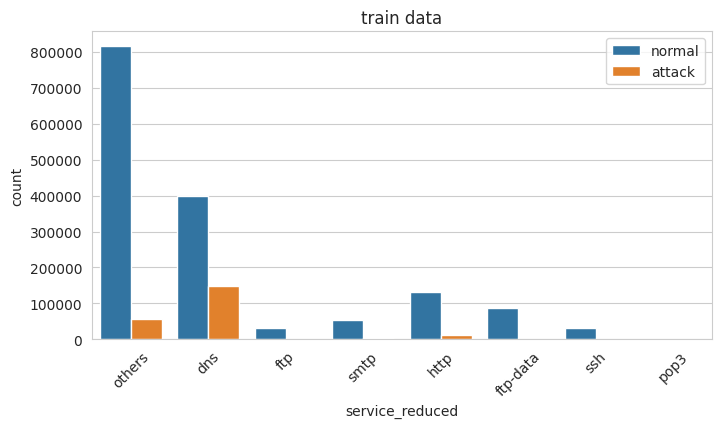

In [ ]:
col_countplot('service_reduced')

In [ ]:
train['state'].value_counts()

,count
state,
FIN,1034981
CON,392422
INT,343397
REQ,6361
RST,368
ECO,227
CLO,108
URH,78
ACC,34


In [ ]:
to_keep = ['int', 'fin', 'con', 'req']
train['state_reduced'] = train['state'].apply(reduce_column, args=(to_keep,))

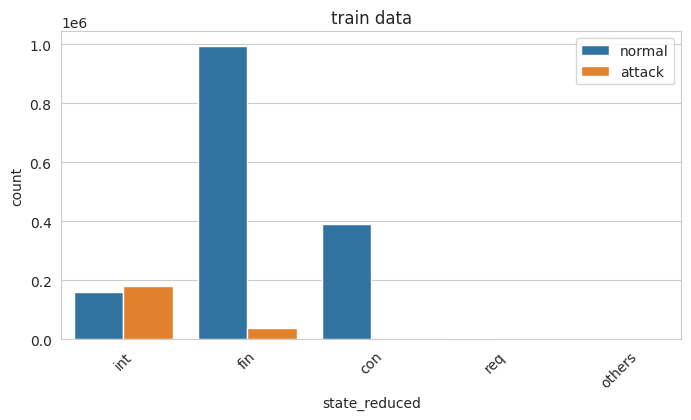

In [ ]:
col_countplot('state_reduced')

In [ ]:
train.drop(columns=['proto_reduced', 'state_reduced', 'service_reduced'], inplace=True)

In [ ]:
train.shape

(1778032, 49)

ct_dst_ltm -> No. of connections of the same destination address in 100 connections according to the last time.

In [ ]:
train['ct_dst_ltm'].nunique()

62

In [ ]:
def dual_plot(col, data1=normal, data2=anomaly, label1='normal', label2='anomaly', method=None):
    """
    This function plots pdf of the given feature on attack and non-attck data
    """
    if method != None:
        sns.set_style('whitegrid')
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.set_style('whitegrid')
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

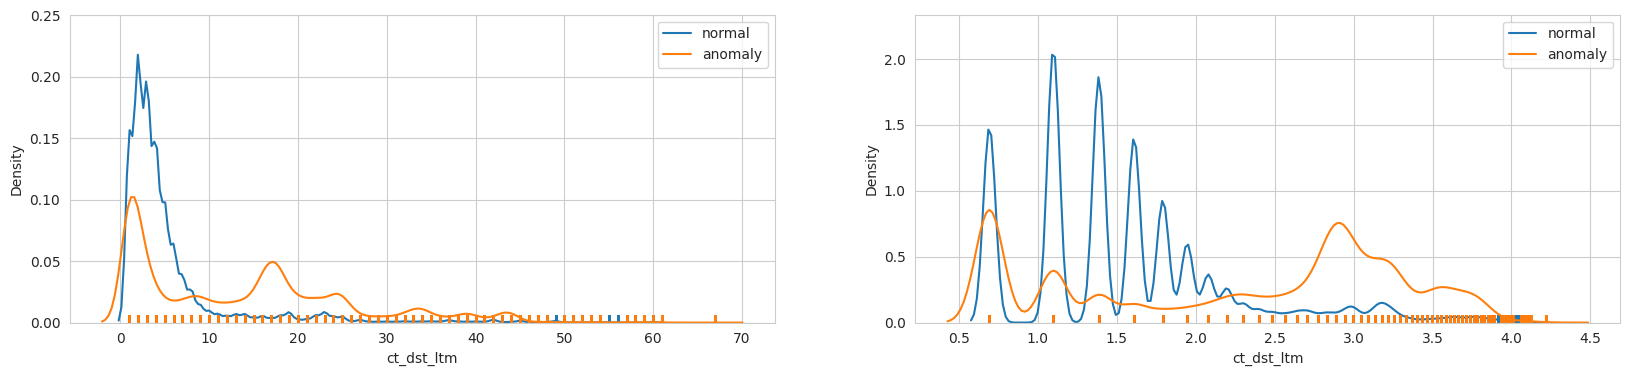

In [ ]:
col = 'ct_dst_ltm'
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

ct_flw_http_mthd -> Numerical feature with discrete set of values.

In [ ]:

train['ct_flw_http_mthd'].nunique()

16

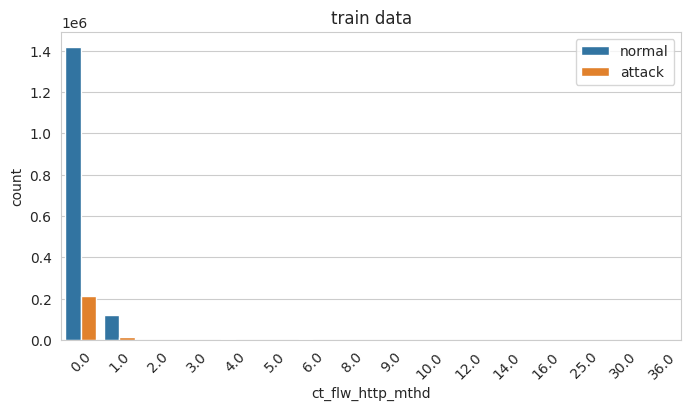

In [ ]:

col_countplot('ct_flw_http_mthd')

ct_srv_src

In [ ]:
col = 'ct_srv_src'
train[col].nunique()

65

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

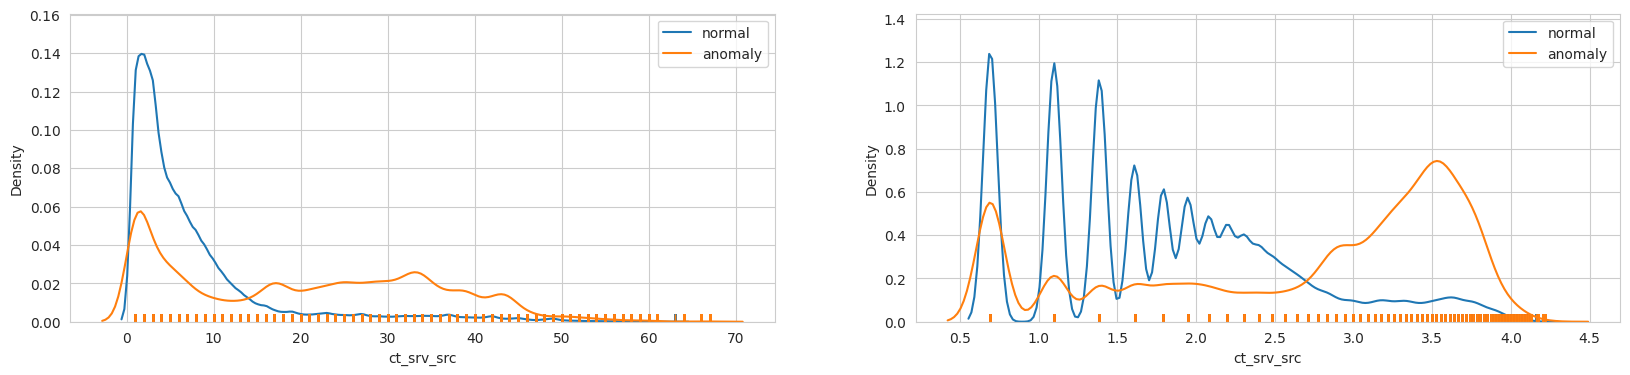

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

ct_state_ttl -> Numerical feature with small discrete set of values

In [ ]:
train['ct_state_ttl'].nunique()

7

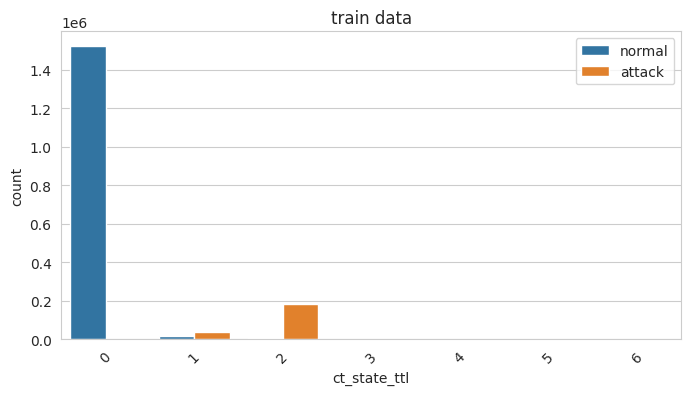

In [ ]:
col_countplot('ct_state_ttl')

ct_dst_sport_ltm

In [ ]:
train['ct_dst_sport_ltm'].nunique()

55

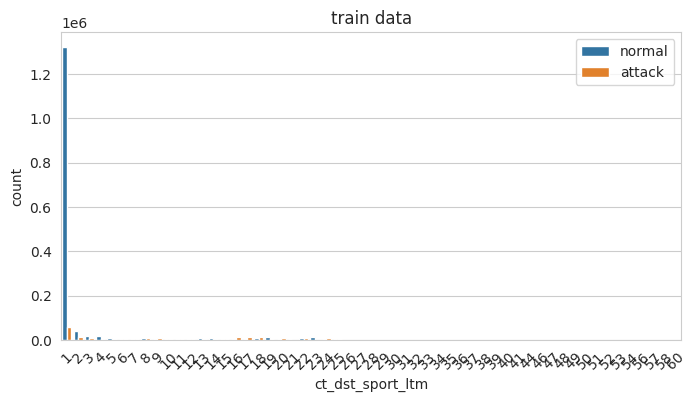

In [ ]:
col_countplot('ct_dst_sport_ltm')

dintpkt
Numerical feature.

In [ ]:
train['dintpkt'].nunique()

719690

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

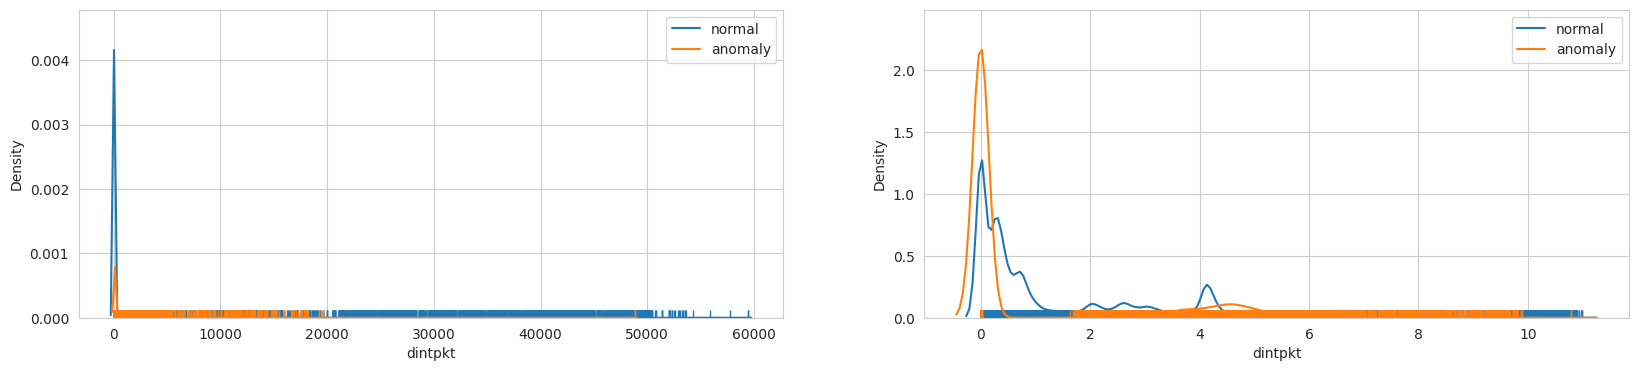

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dintpkt')
plt.subplot(122)
dual_plot('dintpkt', method=np.log1p)
plt.show()

djit
Numerical feature. Destination jitter (mSec)

In [ ]:
train['djit'].nunique()

1013756

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

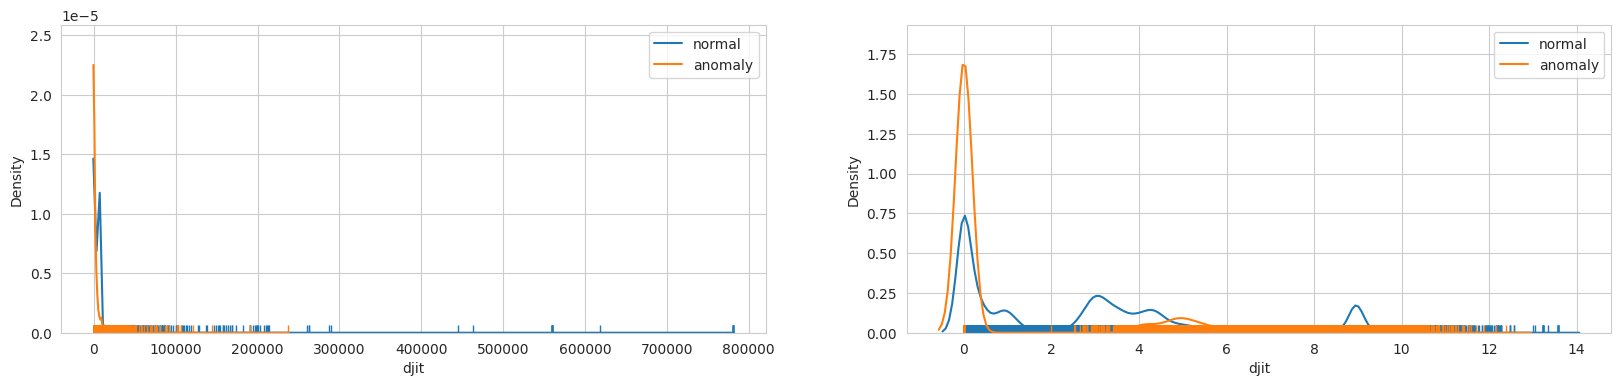

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('djit')
plt.subplot(122)
dual_plot('djit', method=np.log1p)
plt.show()

dload -> Numerical feature. Destination bits per second

In [ ]:
train['dload'].nunique()

857308

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

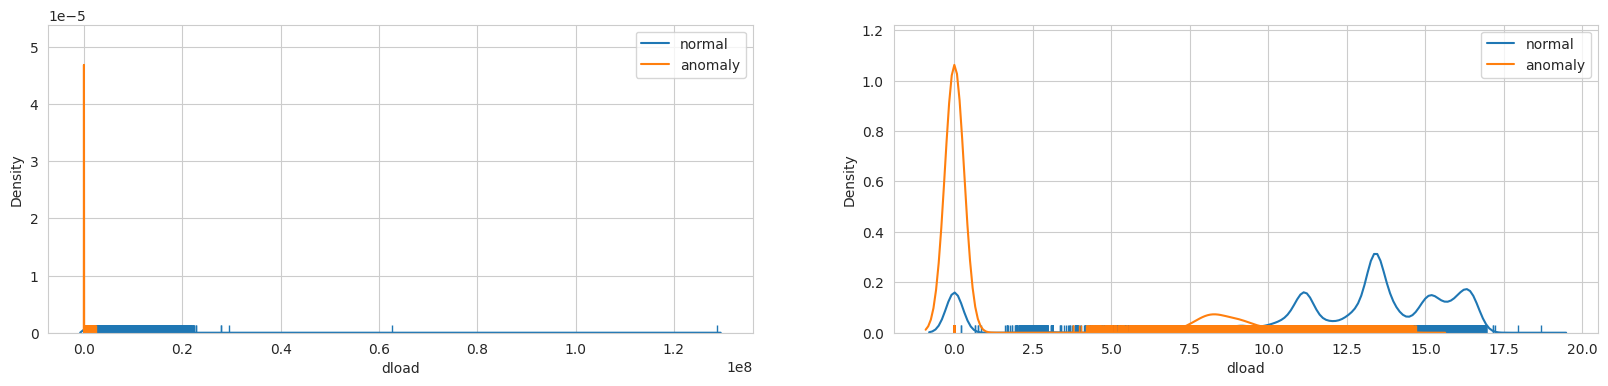

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dload')
plt.subplot(122)
dual_plot('dload', method=np.log1p)
plt.show()

dbytes -> Numerical feature. Destination to source bytes.

In [ ]:
col = 'dbytes'
train[col].nunique()

15519

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

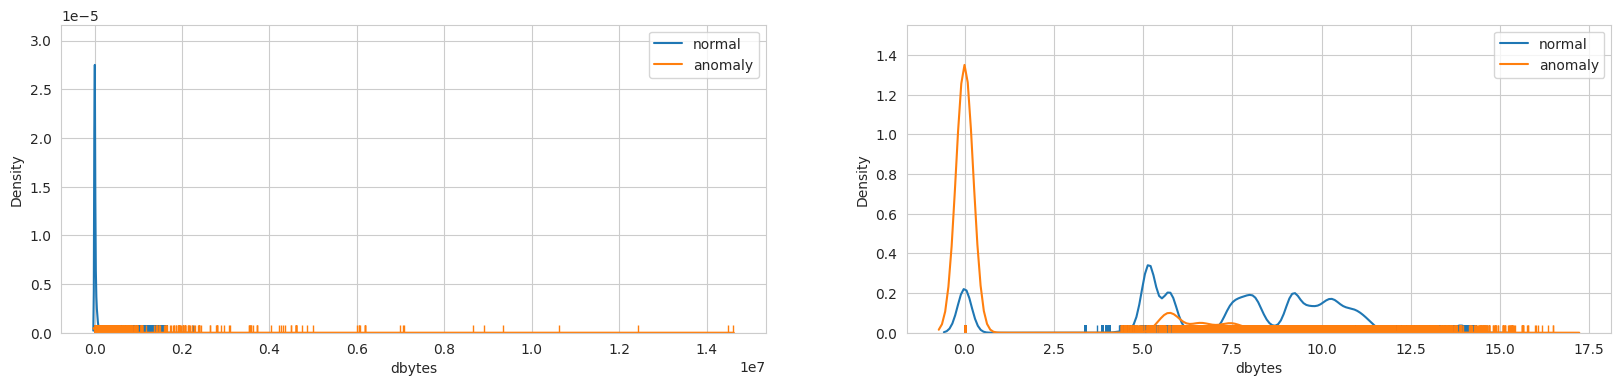

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

dmeansz -> Numerical feature. Mean of the flow packet size transmitted by the dst

In [ ]:
col = 'dmeansz'
train[col].nunique()

1408

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

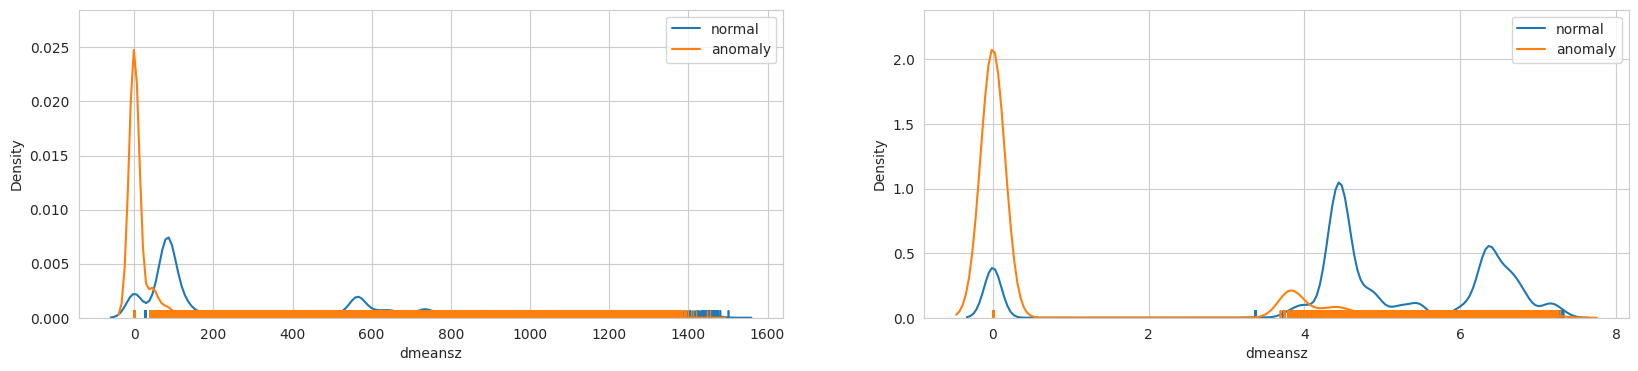

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

dpkts -> Numerical feature destination to source packet count

In [ ]:
train['dpkts'].nunique()

1157

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

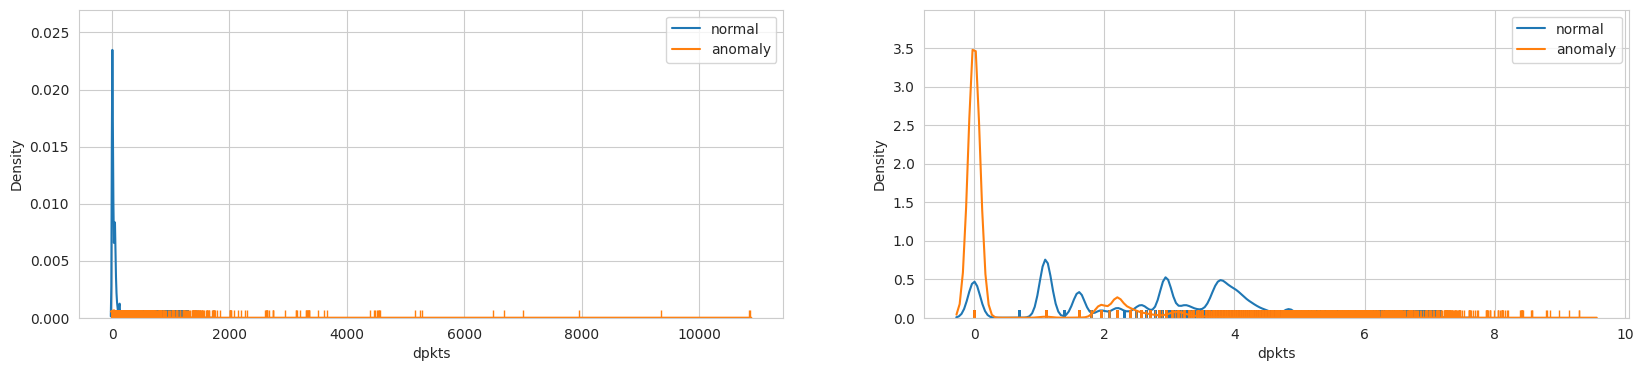

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dpkts')
plt.subplot(122)
dual_plot('dpkts', method=np.log1p)
plt.show()

dtcpb -> Numerical features. Destination TCP sequence number

In [ ]:
col = 'dtcpb'
train[col].nunique()

1006615

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

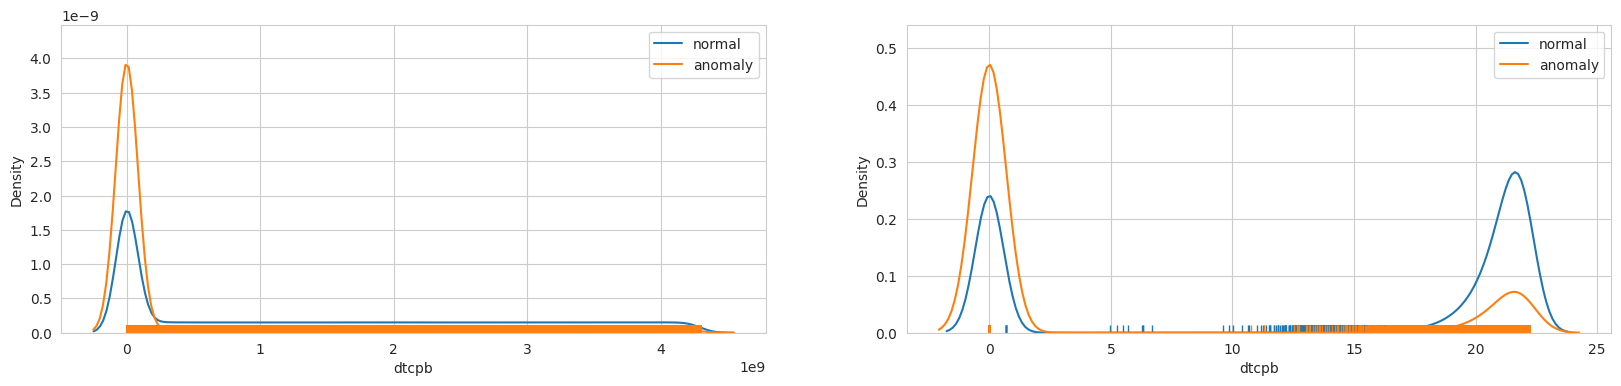

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

dttl -> sestination to source time to live, numerical feature with 11 unique value.

In [ ]:
train['dttl'].nunique()

11

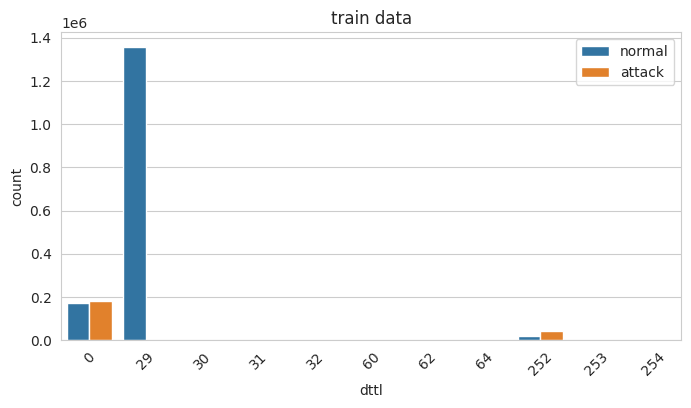

In [ ]:

col_countplot('dttl')

dur
Numerical feature. Record total duration

In [ ]:
col = 'dur'
train[col].nunique()

458708

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

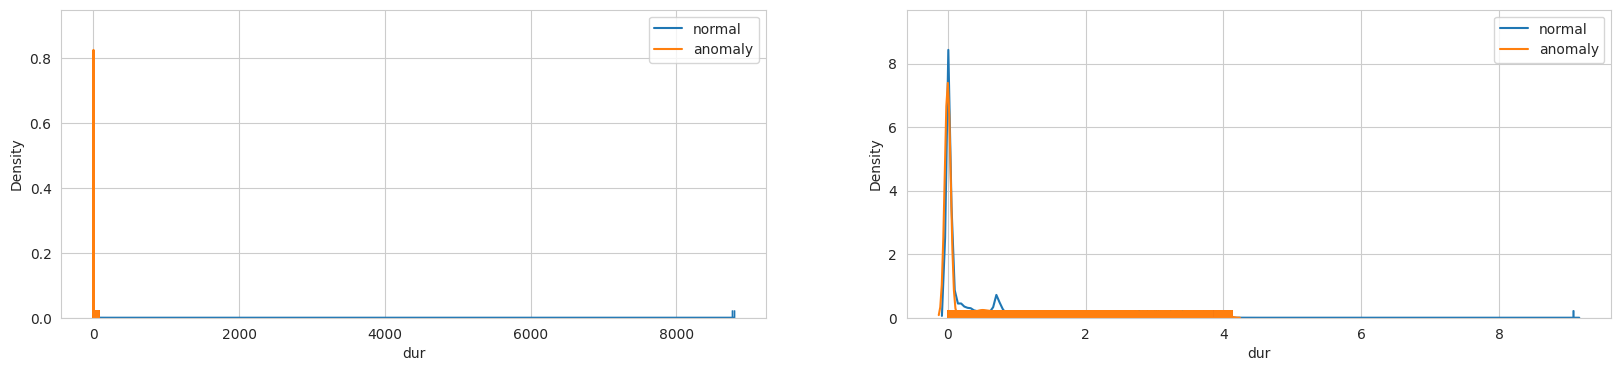

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

sintpkt
Numerical feature. Source inter-packet arrival time (mSec)

In [ ]:
train['sintpkt'].nunique()

728686

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

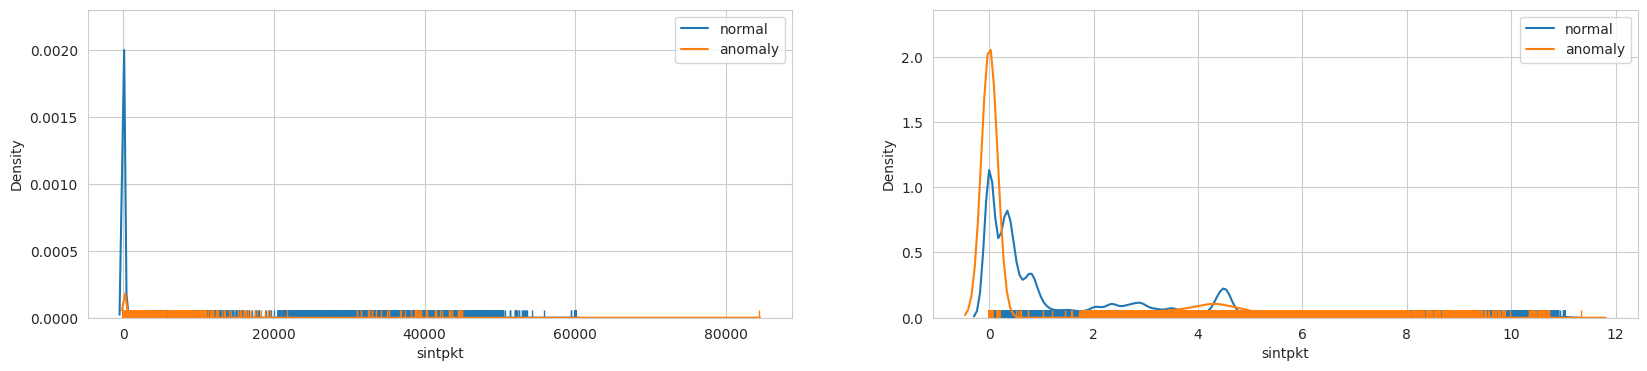

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('sintpkt')
plt.subplot(122)
dual_plot('sintpkt', method=np.log1p)
plt.show()

sttl
Numerical feature with only 13 unique value.
Source to destination time to live

In [ ]:
train['sttl'].nunique()

13

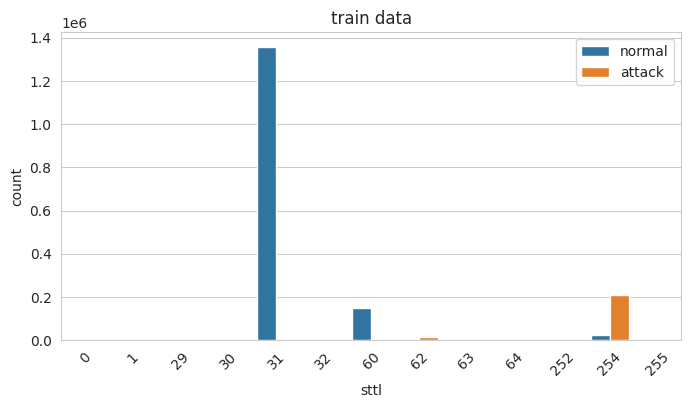

In [ ]:
col_countplot("sttl")

stcpb
Numerical feature. Source TCP sequence number

In [ ]:
col = 'stcpb'
train[col].nunique()

1007023

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

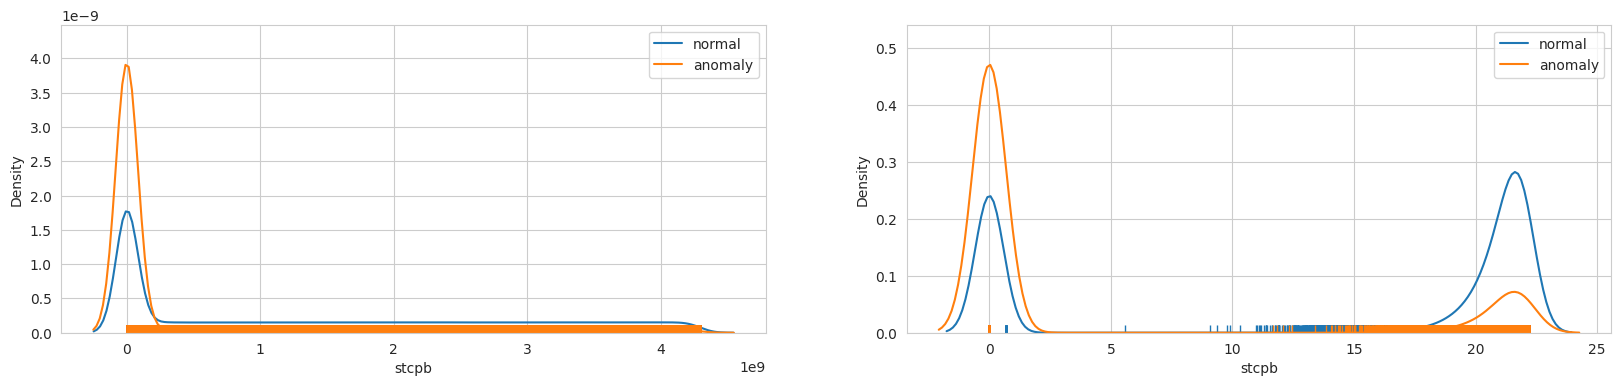

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

swin
Numerical feature with 22 unique value.

In [ ]:
train['swin'].nunique()

22

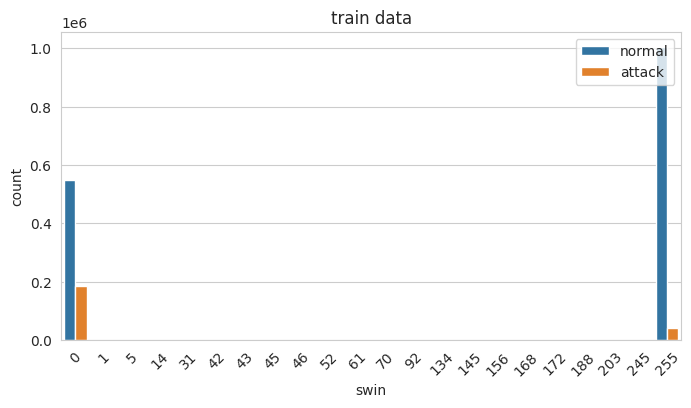

In [ ]:
col_countplot('swin')

sbytes
Source to destination bytes
Numerical feature with large range of values upto 1e7

In [ ]:
col = 'sbytes'
train[col].nunique()

11619

<ipython-input-33-9548ea8fc4b0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
<ipython-input-33-9548ea8fc4b0>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col], label=label2, hist=False, rug=True)
<ipython-input-33-

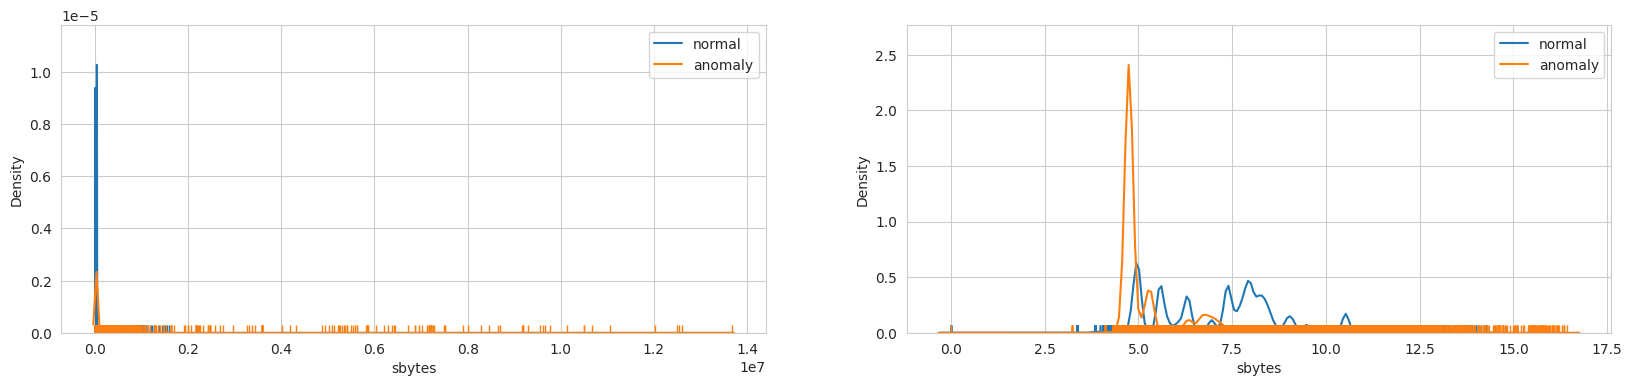

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()